In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing

In [29]:
df=pd.read_csv('training.csv', index_col=0)
df_test=pd.read_csv('testing.csv', index_col=0)

In [30]:
st=[-1]*2197
st[0]=df.iloc[0].values[0]
alp=0.1
for i, val in enumerate(df.temperature[1:]):
    st[i]=alp*df.iloc[i-1].values[0]+(1-alp)*st[i-1]


err = sqrt(mean_squared_error(df.temperature,st))
print('RMSE: %.3f' % err)

RMSE: 6.686


In [31]:
vals=np.arange(0.1, 1.0, 0.1)
error=[-1]*9

st=[-1]*2197
st[0]=df.iloc[0].values[0]

for j,alp in enumerate(vals):
    st=[-1]*2197
    st[0]=df.iloc[0].values[0]
    print ("alpha = ", alp, ",", end="")
    
    for i, val in enumerate(df.temperature[1:]):
        st[i]=alp*df.iloc[i-1].values[0]+(1-alp)*st[i-1]
    
    error[j] = sqrt(mean_squared_error(df.temperature,st))
    print('RMSE: %.3f' % error[j])
    

alpha =  0.1 ,RMSE: 6.686
alpha =  0.2 ,RMSE: 5.523
alpha =  0.30000000000000004 ,RMSE: 4.674
alpha =  0.4 ,RMSE: 4.043
alpha =  0.5 ,RMSE: 3.590
alpha =  0.6 ,RMSE: 3.266
alpha =  0.7000000000000001 ,RMSE: 3.033
alpha =  0.8 ,RMSE: 2.869
alpha =  0.9 ,RMSE: 2.757


In [32]:
errors=st - df.temperature.values
#print (errors)

In [33]:
"""
vals=np.arange(0.1, 1.0, 0.1)
error=[-1]*9
for i,val in enumerate(vals):
    print ("alpha = ", val, ",", end="")
    fit= SimpleExpSmoothing(df).fit(smoothing_level=val,optimized=False)
    fcast=fit.forecast(len(df))
    error[i] = sqrt(mean_squared_error(df.temperature,fcast))
    print('RMSE: %.3f' % error[i])
"""    

'\nvals=np.arange(0.1, 1.0, 0.1)\nerror=[-1]*9\nfor i,val in enumerate(vals):\n    print ("alpha = ", val, ",", end="")\n    fit= SimpleExpSmoothing(df).fit(smoothing_level=val,optimized=False)\n    fcast=fit.forecast(len(df))\n    error[i] = sqrt(mean_squared_error(df.temperature,fcast))\n    print(\'RMSE: %.3f\' % error[i])\n'

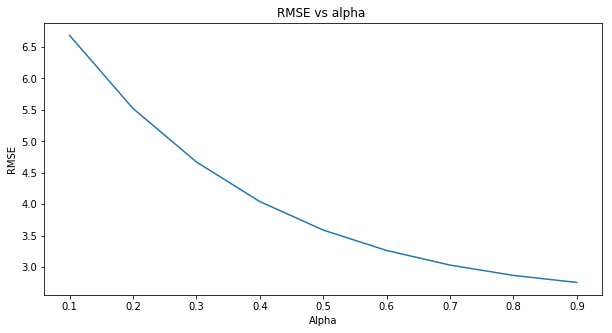

In [34]:
plt.figure(figsize=(10,5))
plt.plot(vals,error)
plt.title("RMSE vs alpha ")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.show()

In [35]:
st1=[-1]*2197
st1[0]=df.iloc[0].values[0]
alp=0.9
for i, val in enumerate(df.temperature[1:]):
    st1[i]=alp*df.iloc[i-1].values[0]+(1-alp)*st1[i-1]


err = sqrt(mean_squared_error(df.temperature,st1))
print('RMSE: %.3f' % err)

RMSE: 2.757


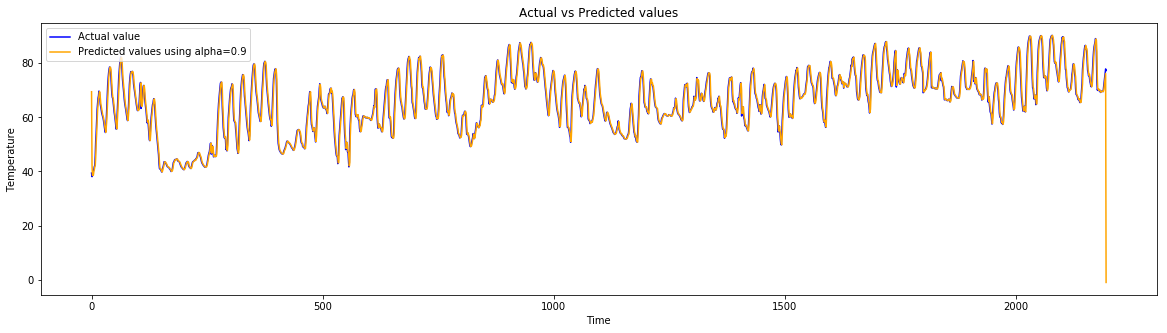

In [36]:
plt.figure(figsize=(20,5))
plt.title("Actual vs Predicted values")
plt.plot(df.temperature, label='Actual value', color='blue')
plt.plot(st1, label='Predicted values using alpha=0.9', color='orange')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend(loc='upper left')
plt.show()

In [37]:
#On testing data
st1=[-1]*len(df_test)
st1[0]=df_test.iloc[0].values[0]
alp=0.9
for i, val in enumerate(df_test.temperature[1:]):
    st1[i]=alp*df_test.iloc[i-1].values[0]+(1-alp)*st1[i-1]


err = sqrt(mean_squared_error(df_test.temperature,st1))
print('RMSE: %.3f' % err)

RMSE: 2.427
